<a href="https://colab.research.google.com/github/devanisdwi/temu-kembali-citra/blob/main/CBIR_Apparel_Devanis_Dwi_Sutrisno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Topik: Content Based Image Retrieval (CBIR) on Apparel

*   Nama: Devanis Dwi Sutrisno
*   Kelas: Temu Kembali Citra 7A
*   NIM: 201910370311078

Detail Project:
1.   Paper Reference: http://jurnal.una.ac.id/index.php/jurti/article/view/2021/1681
2.   Dataset: https://www.kaggle.com/datasets/trolukovich/apparel-images-dataset
     *   Jenis: Gaun dan Sepatu 
     *   Warna: Hitam, Biru, Merah dan Putih
     *   Total: 3.600 Citra (masing-masing 450 citra untuk setiap jenis dan warna)










## Load Library

In [2]:
# for preprocessing & models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model

# for everything else
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np 
import h5py

## Feature Extraction

In [3]:
class FeatureExtractor:
    def __init__(self):
        base_model = VGG16(weights='imagenet')
        self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)

    def extract(self, img):
        img = img.resize((224, 224))
        img = img.convert('RGB')
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        feature = self.model.predict(x)[0]
        return feature / np.linalg.norm(feature)

In [4]:
fe = FeatureExtractor()
features = []
img_paths = []
for feature_path in Path("/content/drive/MyDrive/Classroom/TKC/feature").glob("*.npy"):
    features.append(np.load(feature_path))
    img_paths.append(Path("/content/drive/MyDrive/Classroom/TKC/apparel_dataset") / (feature_path.stem + ".jpg"))
features = np.array(features)

553476096/553467096 [==============================] - 6s 0us/step


In [5]:
for img_path in sorted(Path("/content/drive/MyDrive/Classroom/TKC/apparel_dataset").glob("*.jpg")):
    print(img_path)
    feature = fe.extract(img=Image.open(img_path))
    feature_path = Path("/content/drive/MyDrive/Classroom/TKC/feature") / (img_path.stem + '.npy')
    np.save(feature_path, feature)

/content/drive/MyDrive/Classroom/TKC/apparel_dataset/black_dress_1.jpg
/content/drive/MyDrive/Classroom/TKC/apparel_dataset/black_dress_10.jpg
/content/drive/MyDrive/Classroom/TKC/apparel_dataset/black_dress_100.jpg
/content/drive/MyDrive/Classroom/TKC/apparel_dataset/black_dress_101.jpg
/content/drive/MyDrive/Classroom/TKC/apparel_dataset/black_dress_102.jpg
/content/drive/MyDrive/Classroom/TKC/apparel_dataset/black_dress_103.jpg
/content/drive/MyDrive/Classroom/TKC/apparel_dataset/black_dress_104.jpg
/content/drive/MyDrive/Classroom/TKC/apparel_dataset/black_dress_105.jpg
/content/drive/MyDrive/Classroom/TKC/apparel_dataset/black_dress_106.jpg
/content/drive/MyDrive/Classroom/TKC/apparel_dataset/black_dress_107.jpg
/content/drive/MyDrive/Classroom/TKC/apparel_dataset/black_dress_108.jpg
/content/drive/MyDrive/Classroom/TKC/apparel_dataset/black_dress_109.jpg
/content/drive/MyDrive/Classroom/TKC/apparel_dataset/black_dress_11.jpg
/content/drive/MyDrive/Classroom/TKC/apparel_dataset/bl

## Test Model & Check Euclidean Distance Score

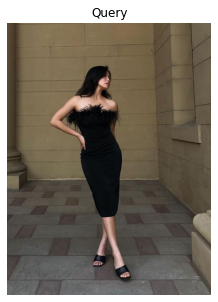

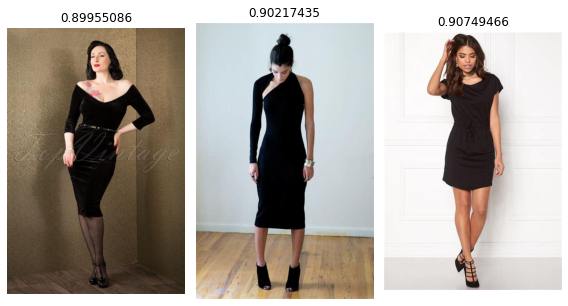

In [9]:
# Insert the image query
img = Image.open("/content/drive/MyDrive/Classroom/TKC/query/black_dress_test.jpg")

# Extract its features
query = fe.extract(img)

# Calculate the similarity (distance) between images
dists = np.linalg.norm(features - query, axis=1)

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:3]
scores = [(dists[id], img_paths[id]) for id in ids]

# Visualize the query
fig = plt.figure(figsize=(5,5))
plt.axis('off')
plt.title('Query')
plt.imshow(img)
plt.show()

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))

for a in range(1*3):
    score = scores[a]
    axes.append(fig.add_subplot(1, 3, a+1))
    subplot_title=str(score[0])
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
    
fig.tight_layout()
plt.show()

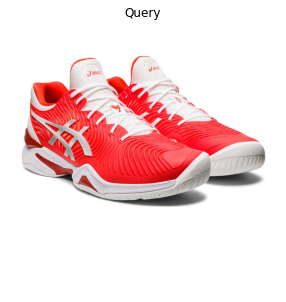

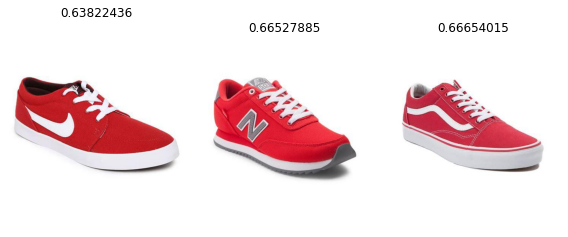

In [10]:
# Insert the image query
img = Image.open("/content/drive/MyDrive/Classroom/TKC/query/red_shoes_test.jpg")

# Extract its features
query = fe.extract(img)

# Calculate the similarity (distance) between images
dists = np.linalg.norm(features - query, axis=1)

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:3]
scores = [(dists[id], img_paths[id]) for id in ids]

# Visualize the query
fig = plt.figure(figsize=(5,5))
plt.axis('off')
plt.title('Query')
plt.imshow(img)
plt.show()

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))

for a in range(1*3):
    score = scores[a]
    axes.append(fig.add_subplot(1, 3, a+1))
    subplot_title=str(score[0])
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
    
fig.tight_layout()
plt.show()

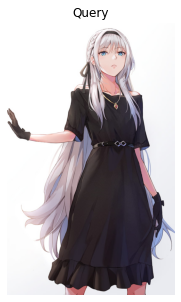

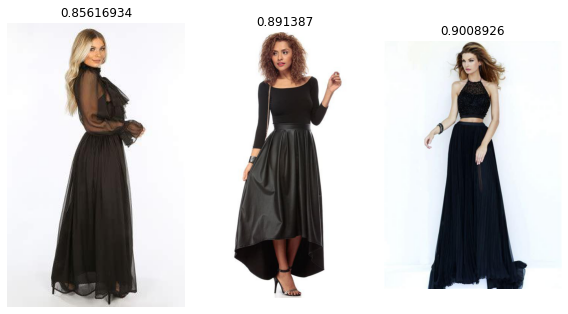

In [12]:
# Insert the image query
img = Image.open("/content/drive/MyDrive/Classroom/TKC/query/black_dress_anime.jpg")

# Extract its features
query = fe.extract(img)

# Calculate the similarity (distance) between images
dists = np.linalg.norm(features - query, axis=1)

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:3]
scores = [(dists[id], img_paths[id]) for id in ids]

# Visualize the query
fig = plt.figure(figsize=(5,5))
plt.axis('off')
plt.title('Query')
plt.imshow(img)
plt.show()

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))

for a in range(1*3):
    score = scores[a]
    axes.append(fig.add_subplot(1, 3, a+1))
    subplot_title=str(score[0])
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
    
fig.tight_layout()
plt.show()

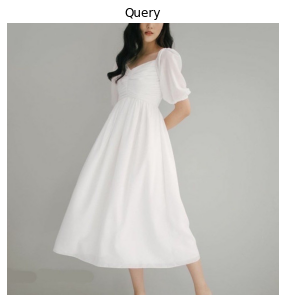

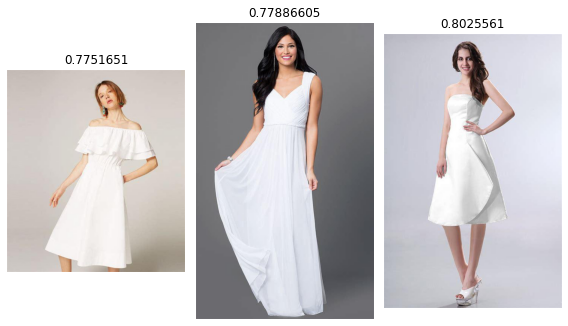

In [16]:
# Insert the image query
img = Image.open("/content/drive/MyDrive/Classroom/TKC/query/white_dress_test.jpg")

# Extract its features
query = fe.extract(img)

# Calculate the similarity (distance) between images
dists = np.linalg.norm(features - query, axis=1)

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:3]
scores = [(dists[id], img_paths[id]) for id in ids]

# Visualize the query
fig = plt.figure(figsize=(5,5))
plt.axis('off')
plt.title('Query')
plt.imshow(img)
plt.show()

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))

for a in range(1*3):
    score = scores[a]
    axes.append(fig.add_subplot(1, 3, a+1))
    subplot_title=str(score[0])
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
    
fig.tight_layout()
plt.show()

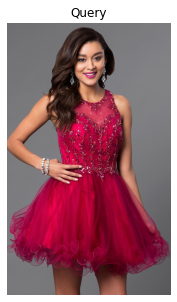

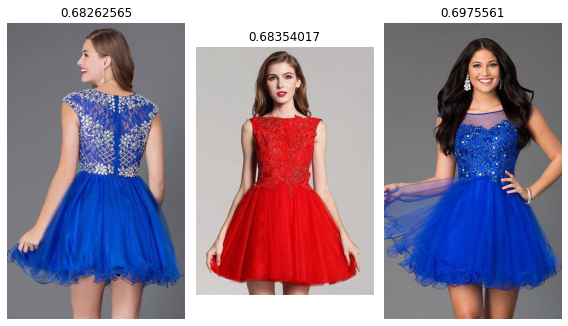

In [13]:
# Insert the image query
img = Image.open("/content/drive/MyDrive/Classroom/TKC/query/red_dress_test.jpg")

# Extract its features
query = fe.extract(img)

# Calculate the similarity (distance) between images
dists = np.linalg.norm(features - query, axis=1)

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:3]
scores = [(dists[id], img_paths[id]) for id in ids]

# Visualize the query
fig = plt.figure(figsize=(5,5))
plt.axis('off')
plt.title('Query')
plt.imshow(img)
plt.show()

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))

for a in range(1*3):
    score = scores[a]
    axes.append(fig.add_subplot(1, 3, a+1))
    subplot_title=str(score[0])
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
    
fig.tight_layout()
plt.show()